### Data Engineering

* In this part the data is analyzed for missing any values
* Looking for correlations between some of the values such as load vs temp, load vs month, etc

* The data also analyzed based on the seasions: Winter, Spring, Summer and Fall to see if any correaltion between 'load' and others

In [55]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt

In [56]:
!ls

sample_load_weather_data.csv
the_data.ipynb


In [57]:
# Read the data
df = pd.read_csv("sample_load_weather_data.csv")

In [58]:
df.tail()

,date,wkday,year,daycode,month,holidays,season,weather_type,load,temp,hr_weather_type,cdd,hdd
350,2017-12-27,twt,2017,3,12,1,W,cold,1.812026,41,xcold,0,19
351,2017-12-28,twt,2017,4,12,1,W,cold,1.741627,43,xcold,0,17
352,2017-12-29,fri,2017,5,12,1,W,cold,1.323119,51,cold,0,9
353,2017-12-30,sat,2017,6,12,1,W,cold,1.056757,55,cold,0,5
354,2017-12-31,sun,2017,0,12,1,W,cold,1.546742,47,xcold,0,13


In [92]:
# Check if the data is missing any null values
df.isnull().values.any()

False

In [59]:
# Mean, STD, MIN, MAX, and Quertiles of the data
df.describe()

,year,daycode,month,holidays,load,temp,cdd,hdd
count,355.0,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,2017.0,3.000000,6.484507,0.966197,1.526779,75.754930,12.233803,0.811268
std,0.0,2.011268,3.491986,0.180976,0.455645,11.632275,8.865854,3.272188
min,2017.0,0.000000,1.000000,0.000000,0.768609,34.000000,0.000000,0.000000
25%,2017.0,1.000000,3.000000,1.000000,1.123627,69.000000,4.000000,0.000000
50%,2017.0,3.000000,6.000000,1.000000,1.449273,77.000000,12.000000,0.000000
75%,2017.0,5.000000,10.000000,1.000000,1.876555,85.000000,20.000000,0.000000
max,2017.0,6.000000,12.000000,1.000000,2.602438,94.000000,29.000000,26.000000


In [60]:
# Look for any correlation between veriables
# Looking for any stronger positive correlation that is over 0.50
# Looking for any stronger negative correlation that is under -0.50
df.corr()

,year,daycode,month,holidays,load,temp,cdd,hdd
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daycode,NaN,1.000000,0.014480,0.093129,-0.059819,-0.009539,0.030733,0.079837
month,NaN,0.014480,1.000000,-0.067880,0.202572,0.030262,0.119510,0.133614
holidays,NaN,0.093129,-0.067880,1.000000,0.050338,0.115480,0.096489,-0.068046
load,NaN,-0.059819,0.202572,0.050338,1.000000,0.673212,0.853974,0.046760
temp,NaN,-0.009539,0.030262,0.115480,0.673212,1.000000,0.938104,-0.635389
cdd,NaN,0.030733,0.119510,0.096489,0.853974,0.938104,1.000000,-0.343077
hdd,NaN,0.079837,0.133614,-0.068046,0.046760,-0.635389,-0.343077,1.000000


In [61]:
# Based on above data 
# There a strong positive correlation between 'load' and temp with 0.67
# There is a strong postivive correlation between 'load' and 'cdd' with 0.85
# Strong positive correlation between 'temp' and 'cdd' with 0.94
# Strong negative correlation between 'temp' and 'hdd' with -0.64

# NOTE: These correation is for linear correlation

In [62]:
# Based on correlation above let's check their plots 

In [63]:
df["hr_weather_type"].unique()

array(['mild', 'cold', 'xcold', 'hot', 'xxhot', 'xhot'], dtype=object)

In [64]:
df['weather_type'].unique()

array(['mild', 'cold', 'hot'], dtype=object)

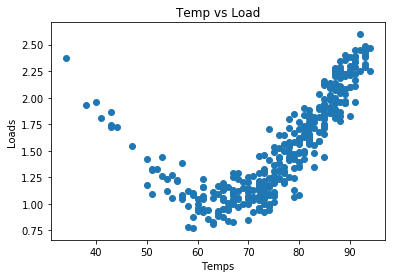

In [70]:
# Plot 1: Load vs Temp

plt.scatter(df['temp'], df['load'])
plt.title("Temp vs Load")
plt.xlabel("Temps")
plt.ylabel("Loads")
plt.savefig("loads-temp.png")
plt.show()

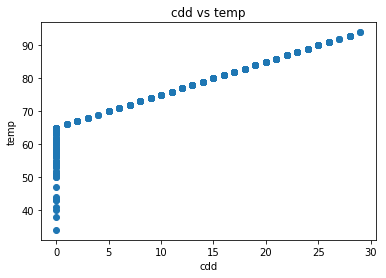

In [71]:
# Plot 2: Cdd vs load

plt.scatter(df['cdd'], df['temp'])
plt.title("cdd vs temp")
plt.xlabel("cdd")
plt.ylabel("temp")
plt.savefig("cdd-temp.png")
plt.show()

# the trend is abvious since cdd is temp - 65

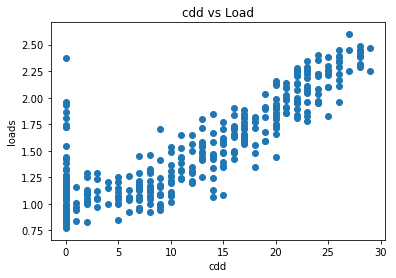

In [72]:
# Plot 3: cdd vs load

plt.scatter(df['cdd'], df['load'])
plt.title("cdd vs Load")
plt.xlabel("cdd")
plt.ylabel("loads")
plt.savefig("cdd-load.png")
plt.show()

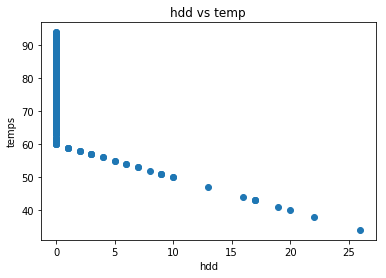

In [73]:
# Plot 4: HDD vs Temp

plt.scatter(df['hdd'], df['temp'])
plt.title("hdd vs temp")
plt.xlabel("hdd")
plt.ylabel("temps")
plt.savefig("hdd-temp.png")
plt.show()

# The trend if abvious since hdd is 65- temp

In [74]:
df.head()

,date,wkday,year,daycode,month,holidays,season,weather_type,load,temp,hr_weather_type,cdd,hdd
0,2017-01-01,sun,2017,0,1,1,W,mild,1.108011,70,mild,5,0
1,2017-01-02,mon,2017,1,1,0,W,mild,1.255454,67,mild,2,0
2,2017-01-03,twt,2017,2,1,1,W,mild,1.074134,70,mild,5,0
3,2017-01-04,twt,2017,3,1,1,W,cold,1.328308,52,cold,0,8
4,2017-01-05,twt,2017,4,1,1,W,cold,1.222549,56,cold,0,4


In [78]:
winter_df = df[df['season']=='W']
winter_df.head()

,date,wkday,year,daycode,month,holidays,season,weather_type,load,temp,hr_weather_type,cdd,hdd
0,2017-01-01,sun,2017,0,1,1,W,mild,1.108011,70,mild,5,0
1,2017-01-02,mon,2017,1,1,0,W,mild,1.255454,67,mild,2,0
2,2017-01-03,twt,2017,2,1,1,W,mild,1.074134,70,mild,5,0
3,2017-01-04,twt,2017,3,1,1,W,cold,1.328308,52,cold,0,8
4,2017-01-05,twt,2017,4,1,1,W,cold,1.222549,56,cold,0,4


In [80]:
df['season'].unique()

array(['W', 'Sp', 'S', 'F'], dtype=object)

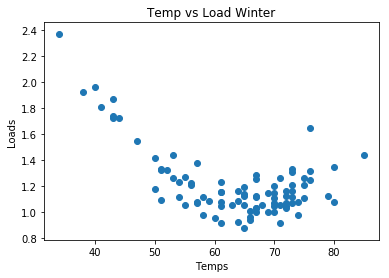

In [85]:
# Plot Winter: Load vs Temp

plt.scatter(winter_df['temp'], winter_df['load'])
plt.title("Temp vs Load Winter")
plt.xlabel("Temps")
plt.ylabel("Loads")
plt.savefig("loads-temp-winter.png")
plt.show()

In [86]:
spring_df = df[df['season']=='Sp']
spring_df.head()

,date,wkday,year,daycode,month,holidays,season,weather_type,load,temp,hr_weather_type,cdd,hdd
59,2017-03-01,twt,2017,3,3,1,Sp,hot,1.174846,72,hot,7,0
60,2017-03-02,twt,2017,4,3,1,Sp,cold,0.883364,64,mild,0,0
61,2017-03-03,fri,2017,5,3,1,Sp,cold,0.810108,63,mild,0,0
62,2017-03-04,sat,2017,6,3,1,Sp,mild,0.937338,60,cold,0,0
63,2017-03-05,sun,2017,0,3,1,Sp,mild,1.154662,66,mild,1,0


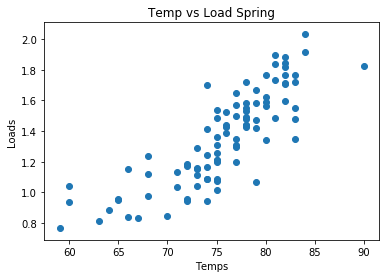

In [87]:
# Plot Spring: Load vs Temp

plt.scatter(spring_df['temp'], spring_df['load'])
plt.title("Temp vs Load Spring")
plt.xlabel("Temps")
plt.ylabel("Loads")
plt.savefig("loads-temp-spring.png")
plt.show()

In [88]:
summer_df = df[df['season']=='S']
summer_df.head()

,date,wkday,year,daycode,month,holidays,season,weather_type,load,temp,hr_weather_type,cdd,hdd
151,2017-06-01,twt,2017,4,6,1,S,hot,1.744142,82,xhot,17,0
152,2017-06-02,fri,2017,5,6,1,S,hot,1.564140,82,xhot,17,0
153,2017-06-03,sat,2017,6,6,1,S,hot,1.822815,84,xhot,19,0
154,2017-06-04,sun,2017,0,6,1,S,hot,1.449273,72,hot,7,0
155,2017-06-05,mon,2017,1,6,1,S,hot,1.631739,81,xhot,16,0


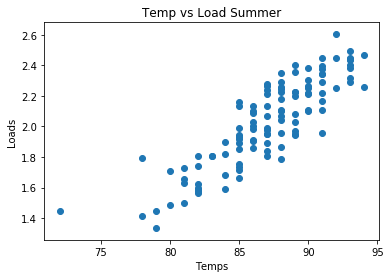

In [89]:
# Plot Spring: Load vs Temp

plt.scatter(summer_df['temp'], summer_df['load'])
plt.title("Temp vs Load Summer")
plt.xlabel("Temps")
plt.ylabel("Loads")
plt.savefig("loads-temp-summer.png")
plt.show()

In [90]:
fall_df = df[df['season']=='F']
fall_df.head()

,date,wkday,year,daycode,month,holidays,season,weather_type,load,temp,hr_weather_type,cdd,hdd
263,2017-10-01,sun,2017,0,10,1,F,hot,2.116519,85,xxhot,20,0
264,2017-10-02,mon,2017,1,10,1,F,hot,1.820771,83,xhot,18,0
265,2017-10-03,twt,2017,2,10,1,F,hot,1.588782,84,xhot,19,0
266,2017-10-04,twt,2017,3,10,1,F,hot,1.810159,83,xhot,18,0
267,2017-10-05,twt,2017,4,10,1,F,hot,1.662634,82,xhot,17,0


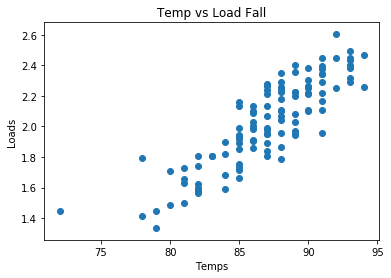

In [91]:
# Plot Fall: Load vs Temp

plt.scatter(summer_df['temp'], summer_df['load'])
plt.title("Temp vs Load Fall")
plt.xlabel("Temps")
plt.ylabel("Loads")
plt.savefig("loads-temp-fall.png")
plt.show()